In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-08-03 14:56:54.279569: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-03 14:56:54.314924: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-03 14:56:54.847751: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados 


#######################################################

#     Este programa quando executado usa dados reconstruídos

#     Para refazer as previsões, tem que apagar os dados dos anos para prever na planilha

########################################################




df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/André - RJ_Reconstrucao_Crustaceos_2024_06_25.xlsx')
df_Siri_azul_ind = pd.DataFrame(df[['Ano','Siri_azul_ind']])

dados = df_Siri_azul_ind.replace(0,np.nan).dropna()
anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1969,1970,1971,1972,1973,1975,1978,1980,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2016])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

pesca = dados['Siri_azul_ind'].values
dados.head()

,Ano,Siri_azul_ind
12,1962,0.339233
13,1963,1.314804
14,1964,1.329132
15,1965,1.212039
16,1966,0.810684


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

pesca_mean = np.mean(pesca)
pesca_std = np.std(pesca)
pesca_norm = (pesca - pesca_mean)/pesca_std

In [4]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,pesca_norm, epochs=100, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Siri_azul/pesos pesca ind/.weights.h5', overwrite=True)

Epoch 1/100


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step - loss: 0.9935
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9755
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9587
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9418
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9245
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9066
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8897
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8751
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8640
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8567
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8483
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8355
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8195
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8028
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7866
Epoch 16/100
1/1 ━━━━━━━━━━━━━

In [5]:
#Pegando os pesos salvos
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Siri_azul/pesos pesca ind/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[ 4.7829695]
 [ 5.736254 ]
 [ 6.6954117]
 [ 7.6871905]
 [ 8.685428 ]
 [11.622209 ]
 [24.911549 ]
 [22.885712 ]
 [22.232708 ]
 [21.168987 ]
 [20.007755 ]
 [18.779785 ]
 [17.584269 ]
 [16.551105 ]
 [15.434818 ]
 [14.085016 ]
 [12.76324  ]
 [11.485634 ]
 [10.292205 ]
 [ 9.439941 ]
 [ 8.656517 ]
 [ 7.8601685]
 [ 7.20551  ]
 [ 6.5518703]
 [ 5.8688664]
 [ 5.19153  ]
 [ 4.5463524]
 [ 3.9298737]
 [ 3.3379774]
 [ 2.8307362]
 [ 1.2025404]]


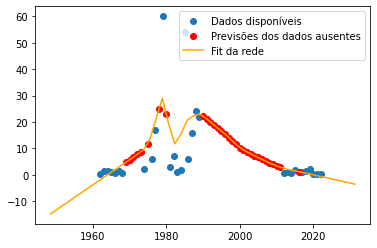

In [6]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*pesca_std + pesca_mean
prev_ausentes = model.predict(anos_para_prever_norm)*pesca_std + pesca_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,pesca,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*pesca_std + pesca_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

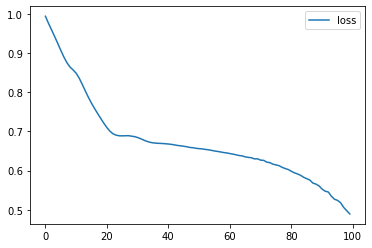

In [7]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [8]:
#Planilha com os dados preenchidos

df_previsoes = pd.DataFrame({'Ano':anos_para_prever, 'Siri_azul_ind':prev_ausentes.flatten()})


df_previsoes.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Siri_azul/Interpolação Siri_azul_ind.xlsx')

df_previsoes

,Ano,Siri_azul_ind
0,1969,4.782969
1,1970,5.736254
2,1971,6.695412
3,1972,7.687191
4,1973,8.685428
5,1975,11.622209
6,1978,24.911549
7,1980,22.885712
8,1990,22.232708
9,1991,21.168987
